In [90]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import datasets

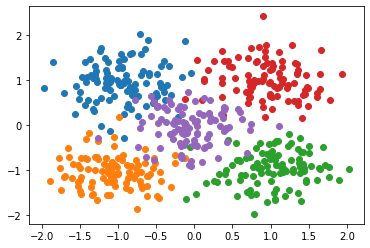

In [91]:
n_pts = 500
centers = [[-1,1], [-1,-1], [1,-1],[1,1],[0,0]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers=centers, cluster_std=0.4)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [92]:
y_cat = to_categorical(y,5)

In [93]:
model = Sequential()
model.add(Dense(units=5,input_shape=(2,), activation="softmax"))
model.compile(Adam(0.1), loss = "categorical_crossentropy", metrics=["accuracy"])

In [94]:
model.fit(x=X, y=y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9785 - accuracy: 0.6900
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.8700
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.9160
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.9460
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.9460
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.9440
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9520
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9500
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9500
Epoch 11/

In [95]:
def plot_decision_boundary(X, y_cat, model):
  x_span = np.linspace(min(X[:,0])- 0.25, max(X[:,0])+0.25)
  y_span = np.linspace(min(X[:,1])- 0.25, max(X[:,1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()

  grid = np.c_[xx_,yy_] #concatting xx_ and yy_
  pred_func = model.predict_classes(grid) #(model.predict(grid) > 0.5).astype("int16")#model.predict_classes(grid)
  z = pred_func.reshape(xx.shape)

  plt.contourf(xx,yy,z)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


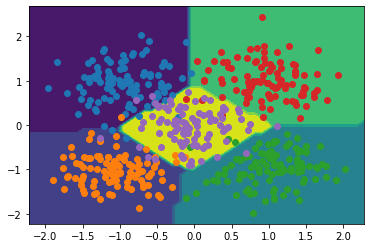

In [96]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is [2]


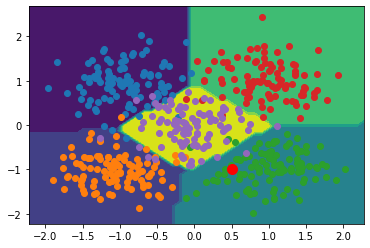

In [97]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x=0.5
y=-1
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker="o", markersize=10, color="r")
print("Prediction is", prediction)